# ARTIFICIAL NEURAL NETWORKS

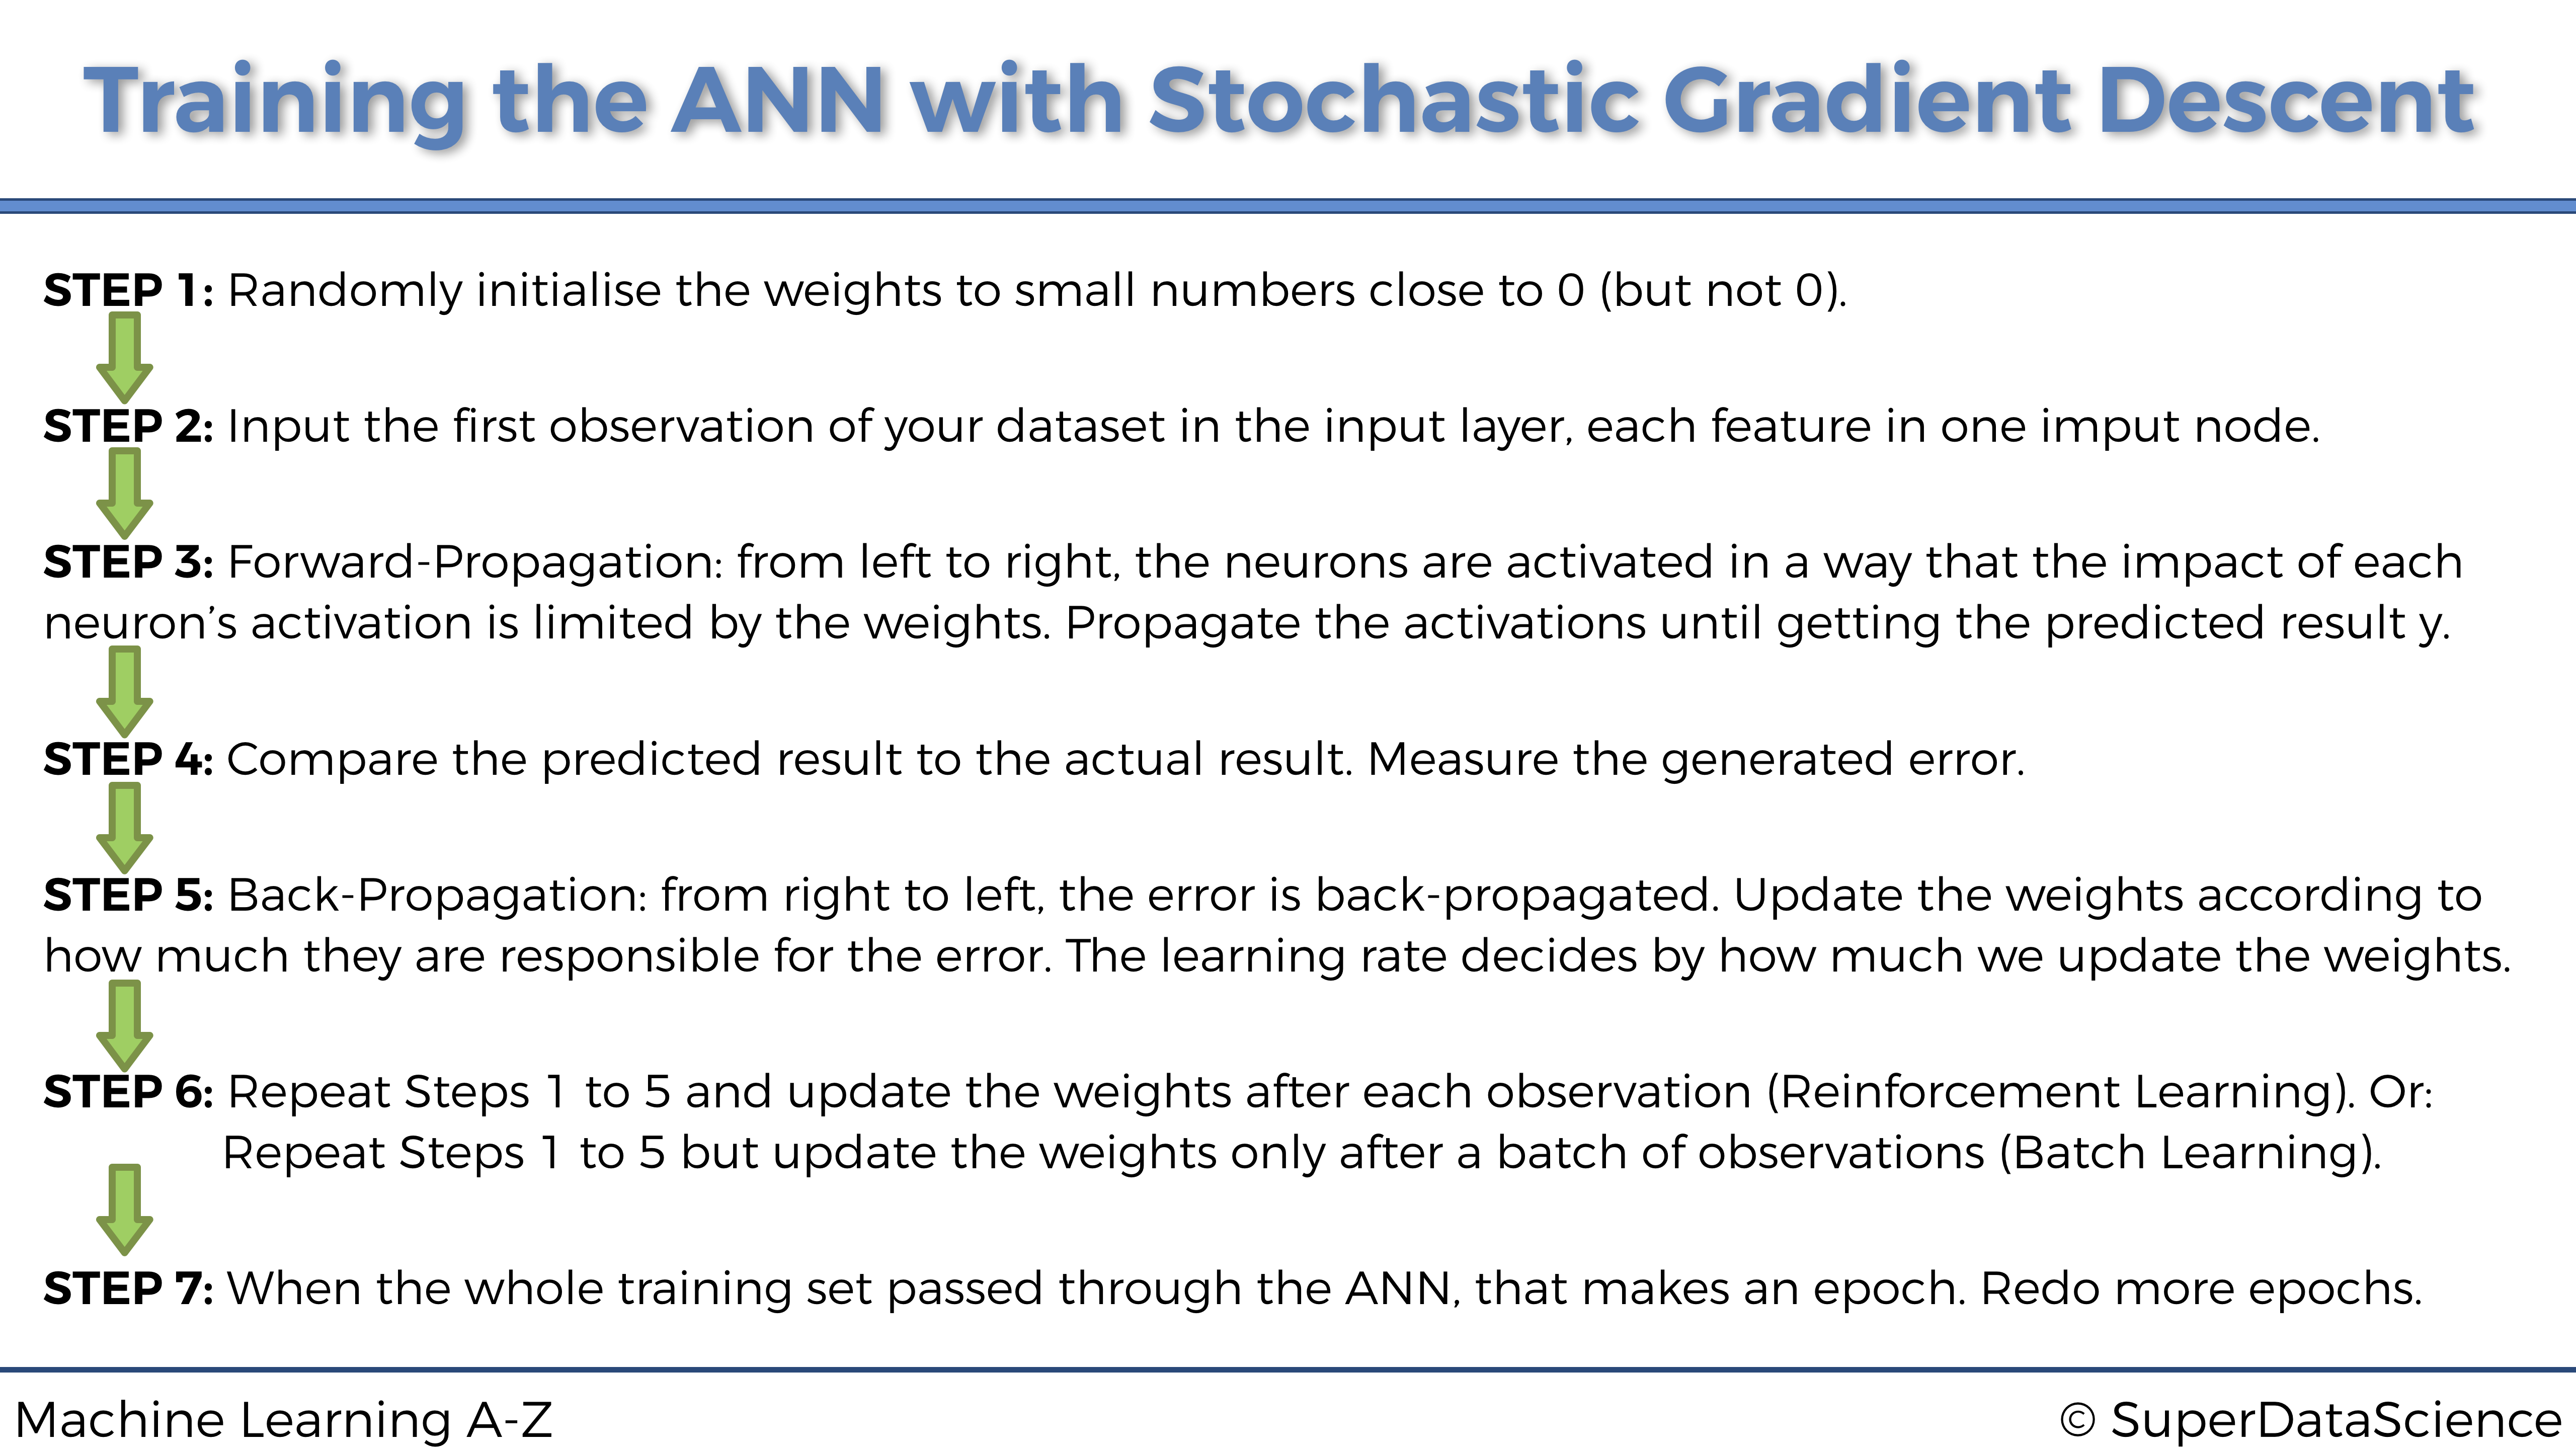

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

# Data Preprocessing

In [3]:
dataset = pd.read_csv("Churn_Modelling.csv")
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
print(y)

[1 0 1 ... 1 1 0]


## Encoding Categorical Data

### Label Encoding "Gender" Data

In [7]:
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])
print(x)

[[619 'France' 0 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 0 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 0 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 0 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 0 43 2 125510.82 1 1 1 79084.1]
 [645 'Spain' 1 44 8 113755.78 2 1 0 149756.71]
 [822 'France' 1 50 7 0.0 2 1 1 10062.8]
 [376 'Germany' 0 29 4 115046.74 4 1 0 119346.88]
 [501 'France' 1 44 4 142051.07 2 0 1 74940.5]
 [684 'France' 1 27 2 134603.88 1 1 1 71725.73]
 [528 'France' 1 31 6 102016.72 2 0 0 80181.12]
 [497 'Spain' 1 24 3 0.0 2 1 0 76390.01]
 [476 'France' 0 34 10 0.0 2 1 0 26260.98]
 [549 'France' 0 25 5 0.0 2 0 0 190857.79]
 [635 'Spain' 0 35 7 0.0 2 1 1 65951.65]
 [616 'Germany' 1 45 3 143129.41 2 0 1 64327.26]
 [653 'Germany' 1 58 1 132602.88 1 1 0 5097.67]
 [549 'Spain' 0 24 9 0.0 2 1 1 14406.41]
 [587 'Spain' 1 45 6 0.0 1 0 0 158684.81]
 [726 'France' 0 24 6 0.0 2 1 1 54724.03]
 [732 'France' 1 41 8 0.0 2 1 1 170886.17]
 [636 'Spain' 0 32 8 0.0 2 1 0 138555.46]
 [510 'Spain' 0 3

### One Hot Encoding "Geography" Data

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1 79084.1]
 [0.0 0.0 1.0 645 1 44 8 113755.78 2 1 0 149756.71]
 [1.0 0.0 0.0 822 1 50 7 0.0 2 1 1 10062.8]
 [0.0 1.0 0.0 376 0 29 4 115046.74 4 1 0 119346.88]
 [1.0 0.0 0.0 501 1 44 4 142051.07 2 0 1 74940.5]
 [1.0 0.0 0.0 684 1 27 2 134603.88 1 1 1 71725.73]
 [1.0 0.0 0.0 528 1 31 6 102016.72 2 0 0 80181.12]
 [0.0 0.0 1.0 497 1 24 3 0.0 2 1 0 76390.01]
 [1.0 0.0 0.0 476 0 34 10 0.0 2 1 0 26260.98]
 [1.0 0.0 0.0 549 0 25 5 0.0 2 0 0 190857.79]
 [0.0 0.0 1.0 635 0 35 7 0.0 2 1 1 65951.65]
 [0.0 1.0 0.0 616 1 45 3 143129.41 2 0 1 64327.26]
 [0.0 1.0 0.0 653 1 58 1 132602.88 1 1 0 5097.67]
 [0.0 0.0 1.0 549 0 24 9 0.0 2 1 1 14406.41]
 [0.0 0.0 1.0 587 1 45 6 0.0 1 0 0 158684.81]
 [1.0 0.0 0.0 726 0 24 6 0.0 2 1 1 54724.03]
 [1.0 0.0 0.0 732 1 41 8 0.0 2 1 1 170

## Split Dataset

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Feature Scaling

**It's necessary to do feature scaling on all features while dealing with Deep Learning**

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Build ANN

## Initialize ANN

In [12]:
ann = tf.keras.models.Sequential()

# Tensorflow = Root Library
# Keras = Library
# Models = Module
# Sequential = Class

## Adding input & first hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

## Adding second layer

In [14]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

## Adding Output Layer

In [15]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Training ANN

## Compiling ANN

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Train ANN

In [17]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 1ms/step - loss: 0.6437 - accuracy: 0.6529
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.7962
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8037
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8111
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8186
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8211
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8230
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4011 - accura

## Predict result of single observation

Use our ANN model to predict if the customer with the following informations will leave the bank: 
* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: 60000
* Number of Products: 2
* Does this customer have a credit card? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: 50000

So, should we say goodbye to that customer?

In [18]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))

[[0.01966023]]


In [19]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

#False = Won't leave, less chances

[[False]]


## Predicting Test Set Results

In [21]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

## Making Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1526   69]
 [ 212  193]]


0.8595